In [1]:
import os
import numpy as np
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# 專案的根目錄路徑
ROOT_DIR = os.getcwd()

# 置放coco圖像資料與標註資料的目錄
DATA_PATH = ROOT_DIR

In [2]:
import os, shutil

# 存儲小數據集的目錄
base_dir = os.path.join(DATA_PATH, "sData")
if not os.path.exists(base_dir): 
    os.mkdir(base_dir)

# 我們的訓練資料的目錄
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): 
    os.mkdir(train_dir)

# 我們的驗證資料的目錄
validation_dir = os.path.join(base_dir, 'validate')

In [ ]:
import os, shutil

# 原始數據集的路徑
original_dataset_dir = os.path.join(DATA_PATH, "train")

# 存儲小數據集的目錄
base_dir = os.path.join(DATA_PATH, "cats_and_dogs_small")
if not os.path.exists(base_dir): 
    os.mkdir(base_dir)

# 我們的訓練資料的目錄
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): 
    os.mkdir(train_dir)

# 我們的驗證資料的目錄
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): 
    os.mkdir(validation_dir)

# 我們的測試資料的目錄
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)    

# 貓的圖片的訓練資料目錄
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# 狗的圖片的訓練資料目錄
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 貓的圖片的驗證資料目錄
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 狗的圖片的驗證資料目錄
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 貓的圖片的測試資料目錄
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# 狗的圖片的測試資料目錄
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [ ]:
# 複製前1000個貓的圖片到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 cat images to train_cats_dir complete!')

# 複製下500個貓的圖片到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to validation_cats_dir complete!')

# 複製下500個貓的圖片到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to test_cats_dir complete!')

# 複製前1000個狗的圖片到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 dog images to train_dogs_dir complete!')


# 複製下500個狗的圖片到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 dog images to validation_dogs_dir complete!')

# C複製下500個狗的圖片到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
    
print('Copy next 500 dog images to test_dogs_dir complete!')

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( 
        # 這是圖像資料的目錄
        train_dir,
        # 所有的圖像大小會被轉換成150x150
        target_size=(139, 139),
        # 每次產生20圖像的批次資料
        batch_size=20,
        # 由於這是一個二元分類問題, y的lable值也會被轉換成二元的標籤
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(139, 139),
        batch_size=32,
        class_mode='binary')

Found 1702 images belonging to 2 classes.
Found 798 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 139, 139, 3)
labels batch shape: (20,)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(139, 139, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
86/86 [==============================] - 5s 62ms/step - loss: 0.6548 - acc: 0.6081 - val_loss: 0.5693 - val_acc: 0.7707
Epoch 2/50
86/86 [==============================] - 4s 46ms/step - loss: 0.5244 - acc: 0.7456 - val_loss: 0.4375 - val_acc: 0.8271
Epoch 3/50
86/86 [==============================] - 4s 45ms/step - loss: 0.4182 - acc: 0.8096 - val_loss: 0.3419 - val_acc: 0.8659
Epoch 4/50
86/86 [==============================] - 4s 46ms/step - loss: 0.3379 - acc: 0.8543 - val_loss: 0.4057 - val_acc: 0.8095
Epoch 5/50
86/86 [==============================] - 4s 46ms/step - loss: 0.2765 - acc: 0.8925 - val_loss: 0.2533 - val_acc: 0.8872
Epoch 6/50
86/86 [==============================] - 4s 46ms/step - loss: 0.2367 - acc: 0.9125 - val_loss: 0.2890 - val_acc: 0.8860
Epoch 7/50
86/86 [==============================] - 4s 45ms/step - loss: 0.1993 - acc: 0.9260 - val_loss: 0.2253 - val_acc: 0.9023
Epoch 8/50
86/86 [=================

Epoch 38/50
86/86 [==============================] - 4s 47ms/step - loss: 0.0046 - acc: 0.9988 - val_loss: 0.3289 - val_acc: 0.9411
Epoch 39/50
86/86 [==============================] - 4s 48ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.4238 - val_acc: 0.9261
Epoch 40/50
86/86 [==============================] - 4s 46ms/step - loss: 4.4043e-04 - acc: 1.0000 - val_loss: 0.3444 - val_acc: 0.9449
Epoch 41/50
86/86 [==============================] - 4s 46ms/step - loss: 0.0044 - acc: 0.9976 - val_loss: 0.3458 - val_acc: 0.9424
Epoch 42/50
86/86 [==============================] - 4s 48ms/step - loss: 1.6739e-04 - acc: 1.0000 - val_loss: 0.3671 - val_acc: 0.9449
Epoch 43/50
86/86 [==============================] - 4s 46ms/step - loss: 0.0015 - acc: 0.9994 - val_loss: 0.3659 - val_acc: 0.9373
Epoch 44/50
86/86 [==============================] - 4s 46ms/step - loss: 8.1345e-04 - acc: 1.0000 - val_loss: 0.3858 - val_acc: 0.9386
Epoch 45/50
86/86 [==============================] - 4s 46ms/ste

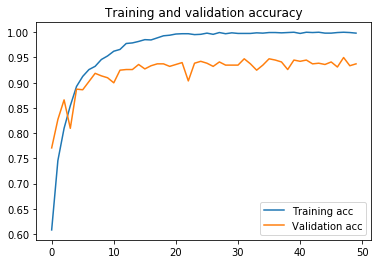

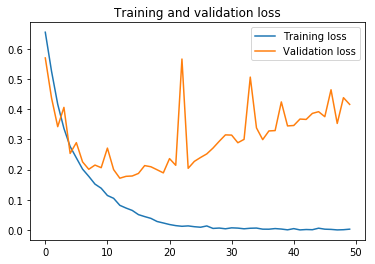

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
td = ImageDataGenerator(rescale=1./255)
magic_dir = os.path.join(base_dir, 'magic')
td_generator = td.flow_from_directory(
        magic_dir,
        target_size=(139, 139),
        batch_size=32,
        class_mode='binary')

result = model.predict_classes(td_generator)
a = 0
b = 0
for i in result:
    if i == 1:
        a += 1
    else:        
        b +=1

print(a,b)

Found 3 images belonging to 2 classes.
3 0


In [19]:
layer_outputs = [layer.output for layer in model.layers[:8]]

# 產生一個model物件, 它的input是原先模型的input, 而它的output則是前8層處理後的outputs
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

layer_outputs # 看一下物件的結構

[<tf.Tensor 'conv2d/Relu:0' shape=(?, 137, 137, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 68, 68, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 66, 66, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 33, 33, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 31, 31, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(?, 13, 13, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 6, 6, 128) dtype=float32>]

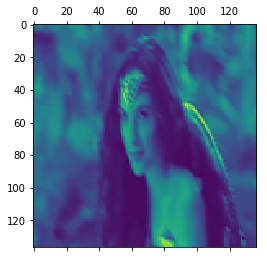

In [20]:
first_layer_activation = activations[0]

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

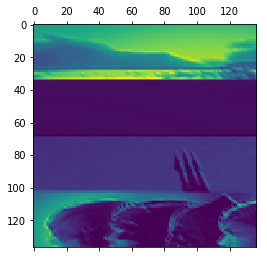

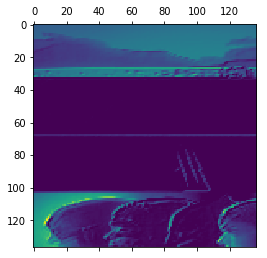

E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


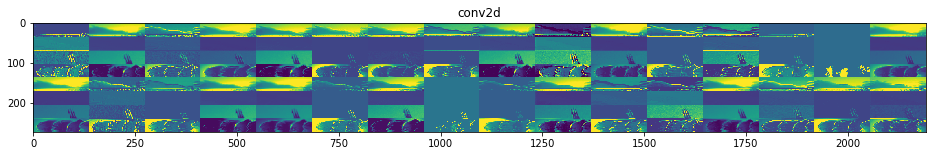

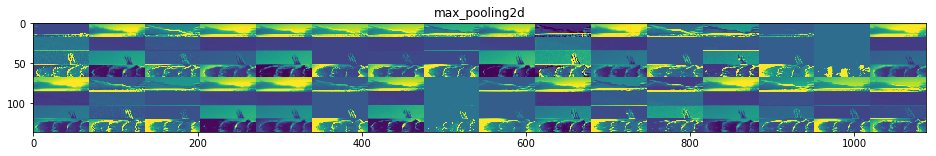

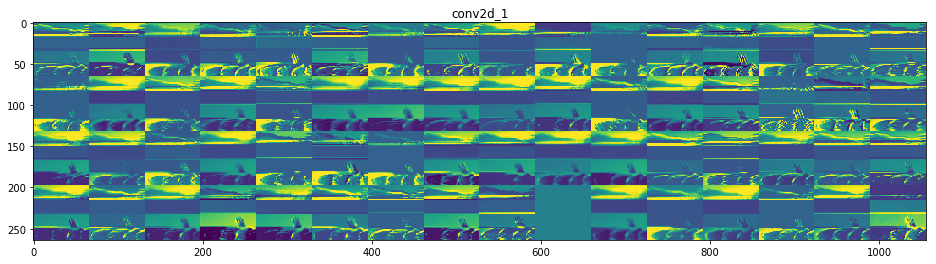

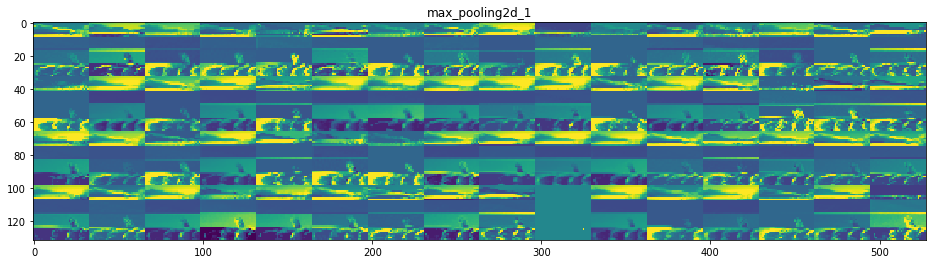

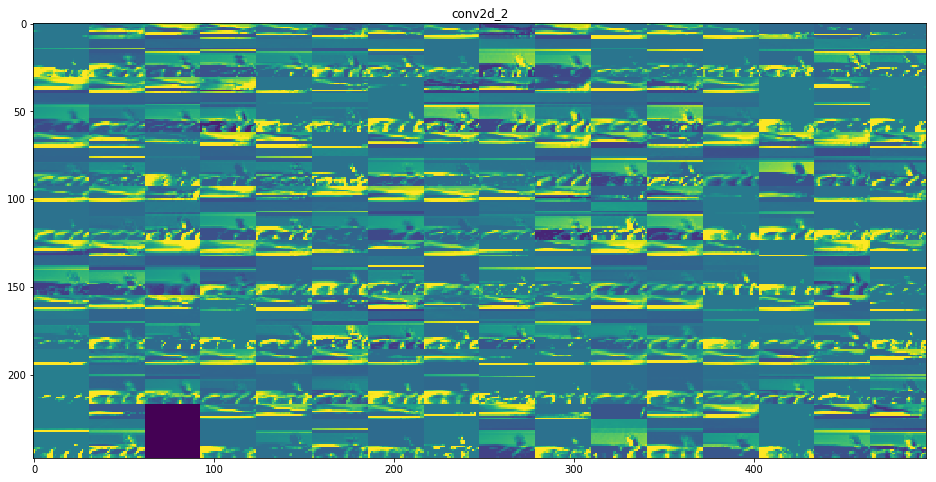

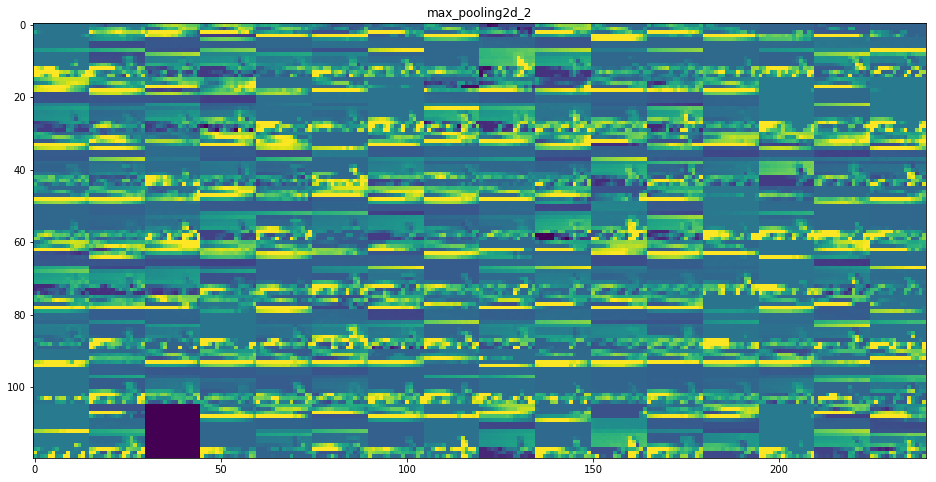

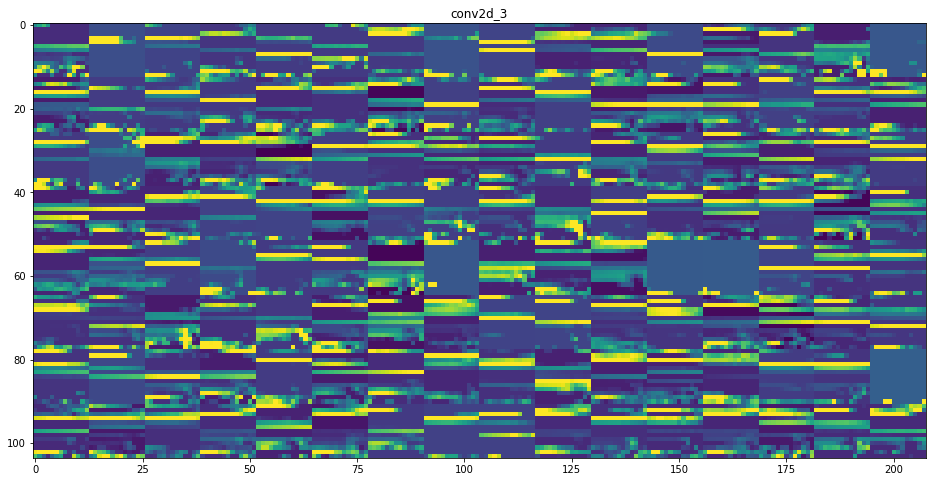

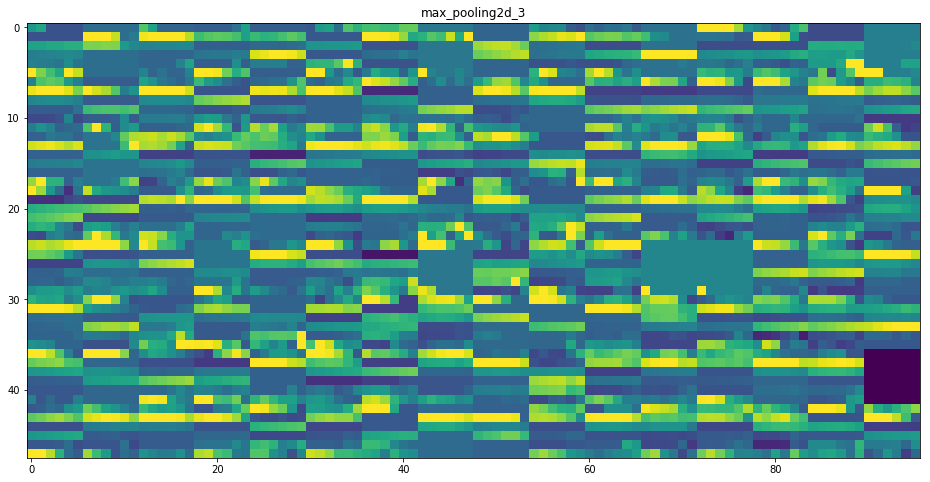

In [21]:
for data_batch, labels_batch in td_generator:
    activations = activation_model.predict(data_batch)
    first_layer_activation = activations[0]
    plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
    plt.show()
    
    plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
    plt.show()
    
    
    layer_names = []
    for layer in model.layers[:8]:
        layer_names.append(layer.name)

    images_per_row = 16 # 每一排打印16個特徵圖

    # 每一層特徵圖的Shapes
    # layer#01 -> (148, 148, 32)
    # layer#02 -> (74, 74, 32)
    # layer#03 -> (72, 72, 64)
    # layer#04 -> (36, 36, 64)
    # layer#05 -> (34, 34, 128)
    # layer#06 -> (17, 17, 128)
    # layer#07 -> (15, 15, 128)
    # layer#08 -> (7, 7, 128)

    # 讓我們打印出我們的特徵圖
    for layer_name, layer_activation in zip(layer_names, activations): # 我們有8層的神經元的輸出

        n_features = layer_activation.shape[-1] # 取得每一層特徵圖的數量


        size = layer_activation.shape[1] # 取得每一個特徵圖的寬與高 (1, size, size, n_features)

        # 我們會把多個特徵圖串接在一個比較大的矩陣
        n_cols = n_features // images_per_row # 算一下這個大矩陣的會有幾欄
        display_grid = np.zeros((size * n_cols, images_per_row * size)) # 產生一個大矩陣

        # 我們會把每一個特徵圖像是磁磚一樣拼貼在一起
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # 展示拼貼出來的結果
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

    break

In [10]:

model.save('my_model.h5')